In [118]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [119]:
import quandl
#quandl.get()
quandl.ApiConfig.api_key = "NmHybnqHLJ7dS3nQtZPb"  #To recognize this jupyter setting api key

In [120]:
start = pd.to_datetime('2012-01-01')
end = pd.to_datetime("2017-01-01")

In [121]:
aapl = quandl.get("WIKI/AAPL.11", start_date = start, end_date = end)
cisco = quandl.get("WIKI/CSCO.11", start_date = start, end_date = end)
ibm = quandl.get("WIKI/IBM.11", start_date = start, end_date = end)
amzn = quandl.get("WIKI/AMZN.11", start_date = start, end_date = end)

In [122]:
aapl.iloc[0]['Adj. Close']

52.848786580038

In [123]:
for stock_df in (aapl, cisco, ibm, amzn):
    stock_df["Normal Return"] = stock_df['Adj. Close'] / stock_df.iloc[0]['Adj. Close'] #adding cumulative return

In [124]:
aapl.tail()

,Adj. Close,Normal Return
Date,,
2016-12-23,115.080808,2.177549
2016-12-27,115.811668,2.191378
2016-12-28,115.317843,2.182034
2016-12-29,115.288214,2.181473
2016-12-30,114.389454,2.164467


In [125]:
#assume we invested some percent of our money in all the four companies share
for stock_df, allo in zip((aapl, cisco, ibm, amzn), [.3, .2, .4, .1]):
    stock_df["Allocation"] = stock_df['Normal Return'] *allo

In [126]:
aapl['Allocation']*1000000

Date
2012-01-03    300000.000000
2012-01-04    301612.236461
2012-01-05    304960.727573
2012-01-06    308148.724558
2012-01-09    307659.946988
                  ...      
2016-12-23    653264.617079
2016-12-27    657413.396830
2016-12-28    654610.167268
2016-12-29    654441.973495
2016-12-30    649340.095692
Name: Allocation, Length: 1258, dtype: float64

In [127]:
#concatenate all the portfolia inverstment returns in one df

port_comp = pd.concat([aapl['Position Values'], cisco['Position Values'], ibm['Position Values'],
                       amzn['Position Values']], axis = 1)

KeyError: 'Position Values'

In [ ]:
port_comp.columns = ['Aapl pos', 'Cisco pos', 'Ibm pos', 'amzn pos']

In [ ]:
for stock_df in (aapl, cisco, ibm, amzn):
    stock_df["Position Values"] = stock_df['Allocation']*1000000

In [ ]:
port_comp

In [ ]:
port_comp['Total pos'] = port_comp.sum(axis=1)
port_comp

In [ ]:
port_comp["Total pos"]

In [ ]:
#$Visualizing our total profit
port_comp['Total pos'].plot(figsize=(10,7))

In [ ]:
port_comp.drop("Total pos", axis=1).plot(figsize = (10,7))

In [ ]:
#building sharpe ratio from here
#mean-riskfreereturn / Std dev

port_comp["Daily return"] = port_comp["Total pos"].pct_change()
port_comp["Daily return"].mean()

In [ ]:
port_comp["Daily return"].std()

In [ ]:
port_comp["Daily return"].plot(kind='hist', bins = 100, figsize=(6,6))

In [ ]:
port_comp['Daily return'].plot.kde()

In [ ]:
cumulative_return = 100*(port_comp["Total pos"][-1]/port_comp['Total pos'][0]-1)
cumulative_return

In [ ]:
#Daily return of stockmean/std dev of daily return to find SR (sharpe Ratio)

SR = port_comp['Daily return'].mean() / port_comp['Daily return'].std()
SR

In [ ]:
#We have weekly data so we multily SR with Sqrt of 252

ASR = np.sqrt(252)*SR
#sharpe ration greater than 1 is acceptable and ration above 2 is better to invest 

# Monte carlo simulation and optimization of algorithm

In [146]:
aapl = pd.read_csv(r'C:\Users\ajay\Downloads\Python-for-Financial-Analysis-and-Algorithmic-Trading-master\Python-for-Financial-Analysis-and-Algorithmic-Trading-master\09-Python-Finance-Fundamentals\AAPL.csv', index_col='Date', parse_dates=True)
ibm = pd.read_csv(r'C:\Users\ajay\Downloads\Python-for-Financial-Analysis-and-Algorithmic-Trading-master\Python-for-Financial-Analysis-and-Algorithmic-Trading-master\09-Python-Finance-Fundamentals\IBM_CLOSE.csv', index_col='Date', parse_dates=True)
amzn  = pd.read_csv(r'C:\Users\ajay\Downloads\Python-for-Financial-Analysis-and-Algorithmic-Trading-master\Python-for-Financial-Analysis-and-Algorithmic-Trading-master\09-Python-Finance-Fundamentals\AMZN.csv', index_col='Date', parse_dates=True)
cisco = pd.read_csv(r'C:\Users\ajay\Downloads\Python-for-Financial-Analysis-and-Algorithmic-Trading-master\Python-for-Financial-Analysis-and-Algorithmic-Trading-master\09-Python-Finance-Fundamentals\CISCO.csv', index_col='Date', parse_dates=True)

In [147]:
stocks = pd.concat([aapl, ibm, amzn, cisco], axis=1)
stocks

,Adj. Close,Adj. Close,Adj. Close,Adj. Close
Date,,,,
2012-01-03,53.063218,160.830881,179.03,15.752778
2012-01-04,53.348386,160.174781,177.51,16.057180
2012-01-05,53.940658,159.415086,177.61,15.997991
2012-01-06,54.504543,157.584912,182.61,15.938801
2012-01-09,54.418089,156.764786,178.56,16.040268
...,...,...,...,...
2016-12-23,115.547742,163.790152,760.59,29.730928
2016-12-27,116.281568,164.212620,771.40,29.877002
2016-12-28,115.785740,163.279259,772.13,29.623807


In [148]:
stocks.columns = ['aapl', 'ibm', 'amzn', 'cisco']

In [149]:
stocks.pct_change().mean()
stocks.pct_change().corr()

,aapl,ibm,amzn,cisco
aapl,1.000000,0.297498,0.235487,0.301990
ibm,0.297498,1.000000,0.258492,0.424672
amzn,0.235487,0.258492,1.000000,0.284470
cisco,0.301990,0.424672,0.284470,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000009388454788>,
      dtype=object)

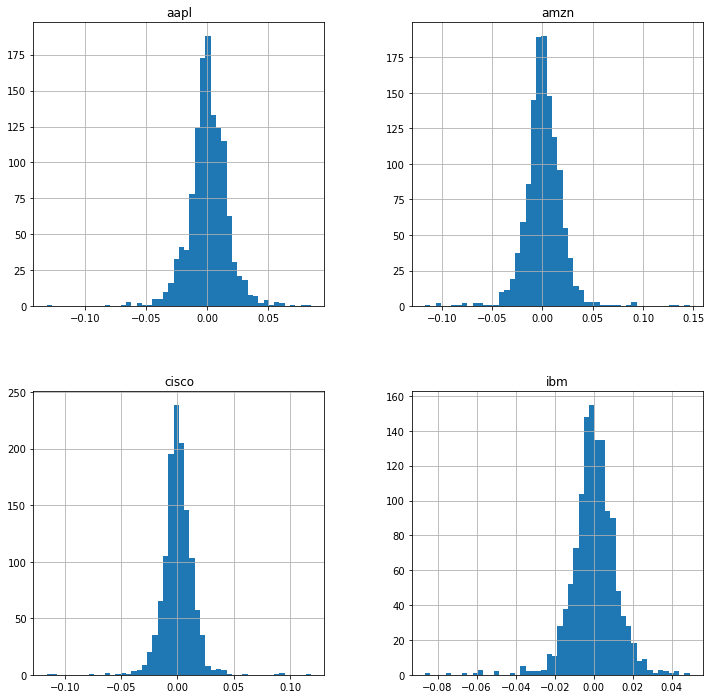

In [150]:
#we use log return to detrend the data

log_return = np.log(stocks/stocks.shift(1))
log_return.hist(figsize=(12,12), bins=50)

In [195]:
daily_ret = stocks/stocks.shift(1)
np.random.seed(233)
log_return.cov()
np.dot(log_return.cov()*252, np.random.random(4))
#np.dot([3,5], [2,1])



array([0.05025338, 0.05850431, 0.08921335, 0.07662185])

In [206]:
np.random.seed(233)
np.sum((log_return.cov()*252).iloc[1,:] * np.random.random(4))

0.05850431352331038

In [207]:
np.random.seed(101)
print(stocks.columns)
weight = np.random.random(4)
print(weight)
print("rebalance weight")
rebalance_wt = weight/np.sum(weight)
print(rebalance_wt)


# expected return
print("expected return")
exp_ret = np.sum((log_return.mean() *weight)*252)
print(exp_ret)

print("expected volatility")
#expected volatality
exp_vol = np.sqrt(np.dot(weight.T, np.dot(log_return.cov()*252, weight)))
print(exp_vol)
#sharpe Ration
print("Sharpe Ratio")
Sharpe_ratio = exp_ret/ exp_vol

Sharpe_ratio

Index(['aapl', 'ibm', 'amzn', 'cisco'], dtype='object')
[0.51639863 0.57066759 0.02847423 0.17152166]
rebalance weight
[0.40122278 0.44338777 0.02212343 0.13326603]
expected return
0.11119765768139617
expected volatility
0.21846910472134914
Sharpe Ratio


0.508985734267669

In [208]:
# np.random.seed(101)
# print(stocks.columns)
# weight = np.random.random(4)
# print(weight)
# print("rebalance weight")
# rebalance_wt = weight/np.sum(weight)
# print(rebalance_wt)

all_weight = np.zeros((5000, len(stocks.columns)))

#storage for saving expected return values we will build an array
exp_ret_arr = np.zeros(5000)
#storage for saving volatility values we will build an array
volatility_ar = np.zeros(5000)
#storage for saving sharpe ration for different weights values we will build an array
SR_arr = np.zeros(5000)


for ind in range(5000):
    weight = np.array(np.random.random(4))
    weights = weight/np.sum(weight)
    #saving weights in array
    all_weight[ind,:] = weights
    
    #calculating expected return
    
    exp_ret_arr[ind] = np.sum((log_return.mean()*weights)*252)
    
    #calculating volatility
    
    volatility_ar[ind] = np.sqrt(np.dot(weights.T, np.dot(log_return.cov()*252, weights)))
    
    #calculating sharpe ratio
    
    SR_arr[ind] = exp_ret_arr[ind]/volatility_ar[ind]
    
    

In [212]:
SR_arr.argmax()

1442

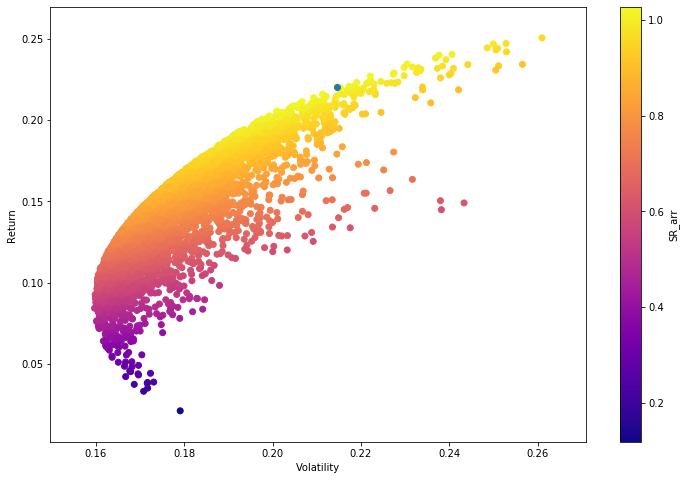

In [213]:
#lets visualize our array into bullet Graph shape drawing
plt.figure(figsize=(12,8))
plt.scatter( volatility_ar,exp_ret_arr, c=SR_arr, cmap="plasma")
plt.colorbar(label = 'SR_arr')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(volatility_ar[1442], exp_ret_arr[1442])

In [214]:
def get_ret_vol_sr(weights):
    ret = np.sum((log_return.mean() *weight)*252)
    vol = np.sqrt(np.dot(weights.T, np.dot(log_return.cov()*252, weights)))
    sr = ret/vol
    return np.array([ret, vol, sr])

In [216]:
from scipy.optimize import minimize

## we are going to find sharpe ratio for different weights. We want to minimize the losses 
## for that we weil build a function that will help to minimize the losses.

# When we have to deal with portfolios having hundreds of stock using the below method is efficient and less time consuming.

In [217]:
#defining a helper function, # What we actually want from our equation
def negat_sharp(weight):
    return get_ret_vol_sr(weight)[2]* -1

In [218]:
# we wil define some constraint function so our optimizer has very less things to check
#constraint will be sum of weights must be equal to zero

#we are defining equality function means whic limitation we want to give to which values
def sum_zero(weight):
#we are defining equality function for optimizer.
    return np.sum(weight)-1

In [219]:
constraints = ({"type":"eq", "fun": sum_zero}) 

In [220]:
#weight value must be between 0 to 1 for all the 4 weights in a vector
bounds = ((0,1),(0,1),(0,1),(0,1))
bounds

((0, 1), (0, 1), (0, 1), (0, 1))

In [221]:
#intial guessses to be selected for our model
initial_guess = [0.25, 0.25,0.25, 0.25 ]

In [222]:
result_optimum = minimize(negat_sharp, x0 = initial_guess, method= 'SLSQP', bounds = bounds, constraints= constraints)


In [223]:
result_optimum
get_ret_vol_sr(result_optimum.x)

array([0.2624381 , 0.15961332, 1.64421174])

In [228]:
#Now we are going to build the effective frontier for our system

#Definition : - The efficient frontier is the set of optimal portfolios that offer the 
#highest expected return for a defined level of risk or the lowest risk for a 
#given level of expected return.


def minimize_volatility(weights):
    return get_ret_vol_sr(weights)[1]

In [229]:
frontier_y = np.linspace(0,0.3, 100)

In [230]:
frontier_volatility = []

for possible_return in frontier_y:
    cons =({'type':'eq', 'fun':sum_zero},
            {'type':'eq', 'fun': lambda w: get_ret_vol_sr(w)[0]- possible_return}) 
    # we want y value to be equal to possible return hence in equality function itis given as 
    #constraint and than subtracted from the lambda output fucntions
    
    result =minimize(minimize_volatility, initial_guess, method="SLSQP", bounds=bounds,
                    constraints = cons)
    frontier_volatility.append(result['fun'])
    

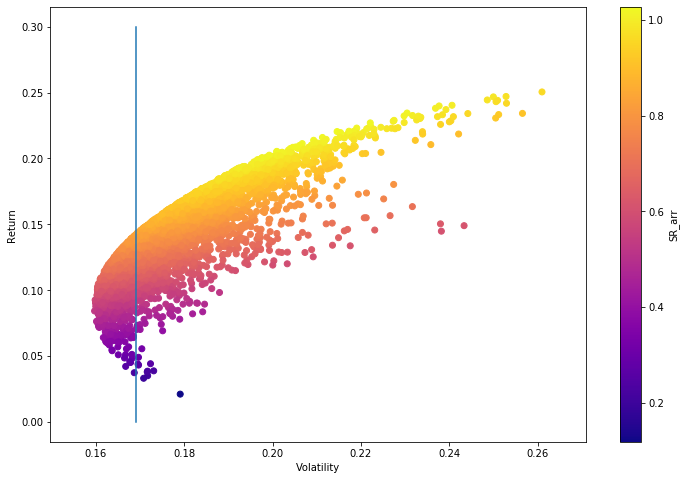

In [232]:
#lets visualize our array into bullet Graph shape drawing
plt.figure(figsize=(12,8))
plt.scatter( volatility_ar,exp_ret_arr, c=SR_arr, cmap="plasma")
plt.colorbar(label = 'SR_arr')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.plot(frontier_volatility,frontier_y)